In [1]:
from pathlib import Path
import pandas as pd

from utils import *
from dataloaders import *
from data_preparation import *
from allResNets import *
from MobileNetV3 import *
from engine import *
from efficientNet import *
from data_transforms import *

change_to_disk()
data_dir = Path("clean_split_1k/")
models_path = Path('Models/')
saves = Path('Trainning_results_saves/')

In [2]:
image_shape = (1920, 1080)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[1]), int(resize[0])]

data_transform = create_transform(resize=resize, rotate=10, color_dev=True, transf_tensor=True, normalize=True, sp_noise=False, gauss_noise=False)

BATCH_SIZE = 16
train_dl, validation_dl, test_dl, train_data, validation_data, test_data, class_names = create_dataloaders(data_dir, data_transform, batch_size = BATCH_SIZE)

In [3]:
NUM_EPOCHS = 100
device = get_device()

resnet18 = ResNet18()
resnet50 = ResNet50()
mobnet_sml = MobileNetV3("small")
mobnet_lrg = MobileNetV3("large")
effnetb0 = EfficientNetB0()
effnetb5 = EfficientNetB5()

loss_fn = nn.CrossEntropyLoss()

In [4]:
model_name = "ResNet18"
model = ResNet18
res18_results, final_res18_model, best_res18_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 82, device)
print("Done")

Done


In [5]:
model_name = "ResNet50"
model = ResNet50
res50_results, final_res50_model, best_res50_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 20, device)
print("Done")

Done


In [6]:
model_name = "MobileNetSmall"
model = MobileNetSmall
mobnet_sml_results, final_mobnet_sml_model, best_mobnet_sml_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 32, device)
print("Done")

Done


In [7]:
model_name = "MobileNetLarge"
model = MobileNetLarge
mobnet_lrg_results, final_mobnet_lrg_model, best_mobnet_lrg_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 85, device)
print("Done")

Done


In [8]:
model_name = "EfficientNetB0"
model = EfficientNetB0
effnetb0_results, final_effnetb0_model, best_effnetb0_model = load_results_model(model_name, models_path, model, NUM_EPOCHS, 42, device)
print("Done")

Done


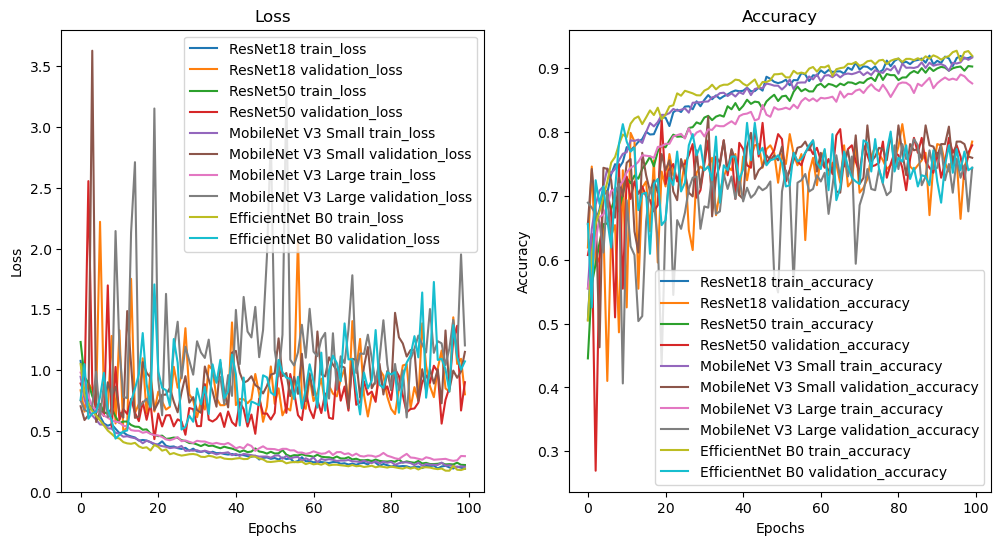

In [9]:
models_results = [
    res18_results[0],
    res50_results[0],
    mobnet_sml_results[0],
    mobnet_lrg_results[0],
    effnetb0_results[0]
]

models_titles =[
    "ResNet18",
    "ResNet50",
    "MobileNet V3 Small",
    "MobileNet V3 Large",
    "EfficientNet B0"
]

plot_all_loss_curves(models_results, models_titles)

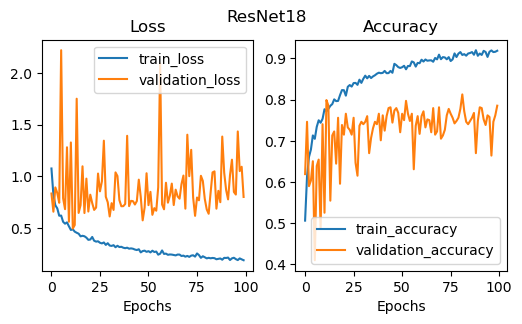

In [10]:
plot_loss_curves(res18_results[0],"ResNet18")

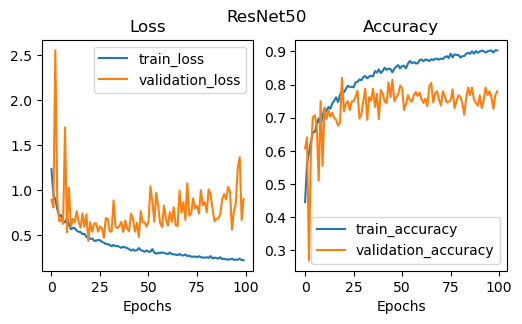

In [11]:
plot_loss_curves(res50_results[0],"ResNet50")

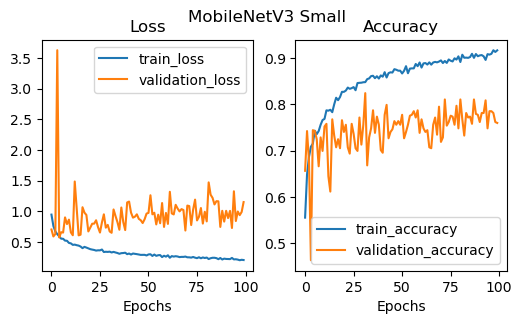

In [12]:
plot_loss_curves(mobnet_sml_results[0],"MobileNetV3 Small")

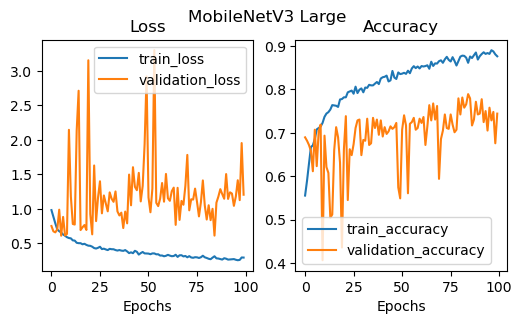

In [13]:
plot_loss_curves(mobnet_lrg_results[0],"MobileNetV3 Large")

In [14]:
train_accuracy = [max(res18_results[0]['train_acc']), max(res50_results[0]['train_acc']), max(mobnet_sml_results[0]['train_acc']), max(mobnet_lrg_results[0]['train_acc']), max(effnetb0_results[0]['train_acc'])]

train_accuracy

[0.91975, 0.9035, 0.917, 0.89025, 0.9275]

In [15]:
res18_results[2], res50_results[2],mobnet_sml_results[2], mobnet_lrg_results[2], effnetb0_results[2]

({'model_name': 'ResNet',
  'model_loss': 0.8349107503890991,
  'model_acc': 78.90625,
  'model_inf_time': 59.1636039018631,
  'std_inf_time': 21.693043409954054},
 {'model_name': 'ResNet',
  'model_loss': 0.9587419033050537,
  'model_acc': 77.34375,
  'model_inf_time': 220.7462077140808,
  'std_inf_time': 29.6923614443411},
 {'model_name': 'MobileNetV3',
  'model_loss': 1.261565089225769,
  'model_acc': 75.9765625,
  'model_inf_time': 31.665501952171326,
  'std_inf_time': 8.830606443427003},
 {'model_name': 'MobileNetV3',
  'model_loss': 1.24149489402771,
  'model_acc': 74.609375,
  'model_inf_time': 56.24709475040436,
  'std_inf_time': 7.925105568764963},
 {'model_name': 'EfficientNet',
  'model_loss': 1.1682558059692383,
  'model_acc': 74.4140625,
  'model_inf_time': 122.27625572681427,
  'std_inf_time': 15.297332152573588})

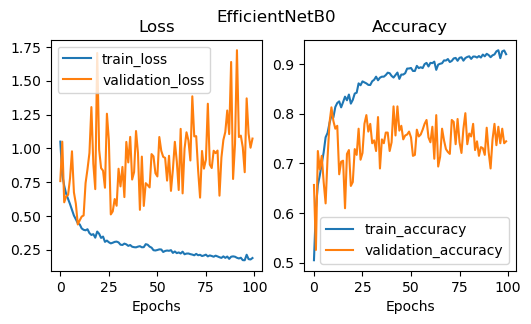

In [16]:
plot_loss_curves(effnetb0_results[0],"EfficientNetB0")

[0.8125, 0.8203125, 0.82421875, 0.7890625, 0.814453125] [59.1636039018631, 220.7462077140808, 31.665501952171326, 56.24709475040436, 122.27625572681427]


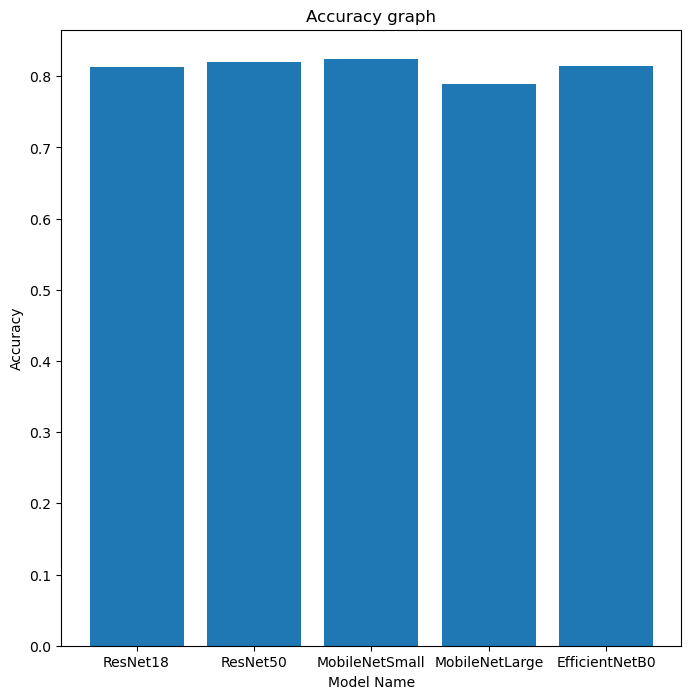

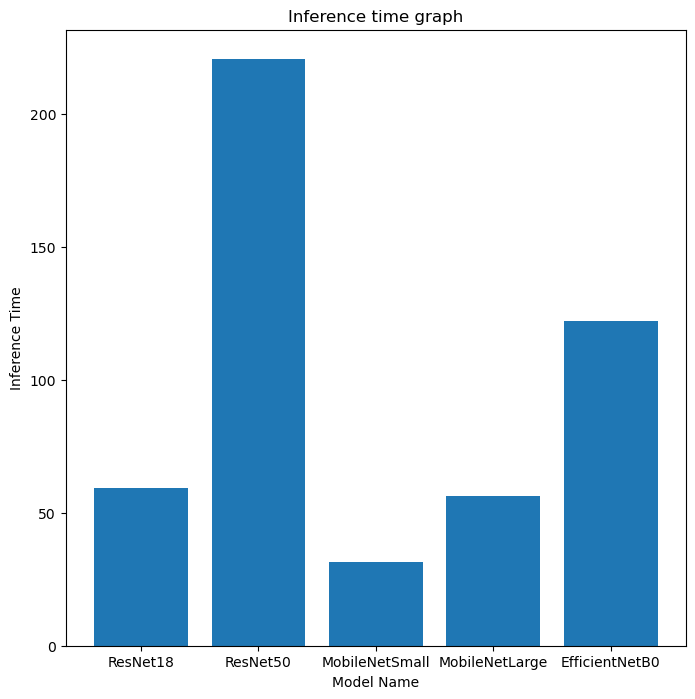

In [17]:
models=['ResNet18', 'ResNet50', 'MobileNetSmall', 'MobileNetLarge', 'EfficientNetB0']
inference_time = [res18_results[2]['model_inf_time'],res50_results[2]['model_inf_time'], mobnet_sml_results[2]['model_inf_time'], mobnet_lrg_results[2]['model_inf_time'], effnetb0_results[2]['model_inf_time']]
accuracy = [max(res18_results[0]['validation_acc']), max(res50_results[0]['validation_acc']), max(mobnet_sml_results[0]['validation_acc']), max(mobnet_lrg_results[0]['validation_acc']), max(effnetb0_results[0]['validation_acc'])]

print(accuracy, inference_time)

plt.figure(figsize=(8,8))
plt.bar(models, accuracy)
plt.title('Accuracy graph')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.show()

plt.figure(figsize=(8,8))
plt.bar(models, inference_time)
plt.title('Inference time graph')
plt.xlabel('Model Name')
plt.ylabel('Inference Time')
plt.show()

In [18]:
from ptflops import get_model_complexity_info


image_shape = (1080, 1920)
resize_factor = 0.3
resize = np.multiply(image_shape,resize_factor)
resize = [int(resize[0]), int(resize[1])]

res = (3,resize[0],resize[1])

res18_macs, res18_params = get_model_complexity_info(final_res18_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

res50_macs, res50_params = get_model_complexity_info(final_res50_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

mobnet_sml_macs, mobnet_sml_params = get_model_complexity_info(final_mobnet_sml_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

mobnet_lrg_macs, mobnet_lrg_params = get_model_complexity_info(final_mobnet_lrg_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

effnetb0_macs, effnetb0_params = get_model_complexity_info(final_effnetb0_model, res, as_strings=False,
                                             print_per_layer_stat=False,verbose=False)

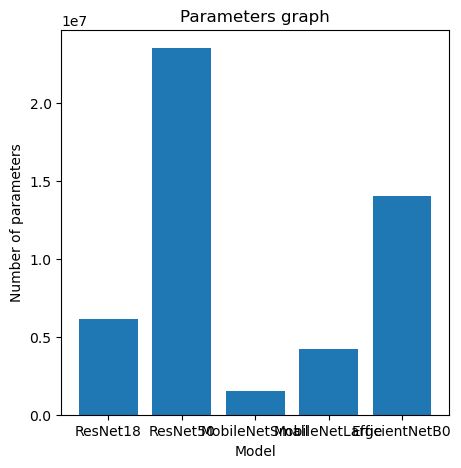

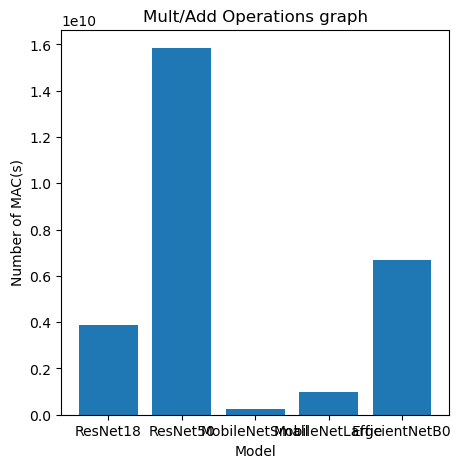

In [19]:
models=['ResNet18', 'ResNet50', 'MobileNetSmall', 'MobileNetLarge', 'EfficientNetB0']
num_params = [res18_params, res50_params, mobnet_sml_params, mobnet_lrg_params, effnetb0_params]
num_macs = [res18_macs, res50_macs, mobnet_sml_macs, mobnet_lrg_macs, effnetb0_macs]

plt.figure(figsize=(5,5))
plt.bar(models, num_params)
plt.title('Parameters graph')
plt.xlabel('Model')
plt.ylabel('Number of parameters')
plt.show()

plt.figure(figsize=(5,5))
plt.bar(models, num_macs)
plt.title('Mult/Add Operations graph')
plt.xlabel('Model')
plt.ylabel('Number of MAC(s)')
plt.show()

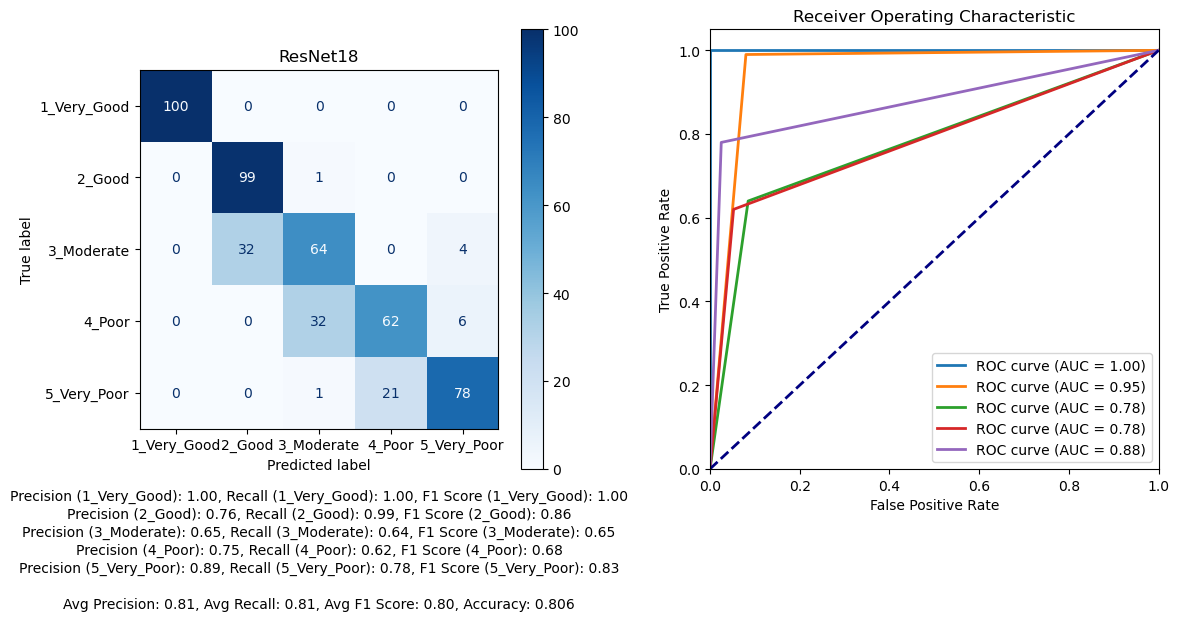

In [20]:
best_res18_model.to(device)
plot_all_measures(best_res18_model,test_dl,device,test_data.classes, "ResNet18")
#plot_confusion_matrix(final_res18_model,test_dl,device,test_data.classes, "ResNet18")

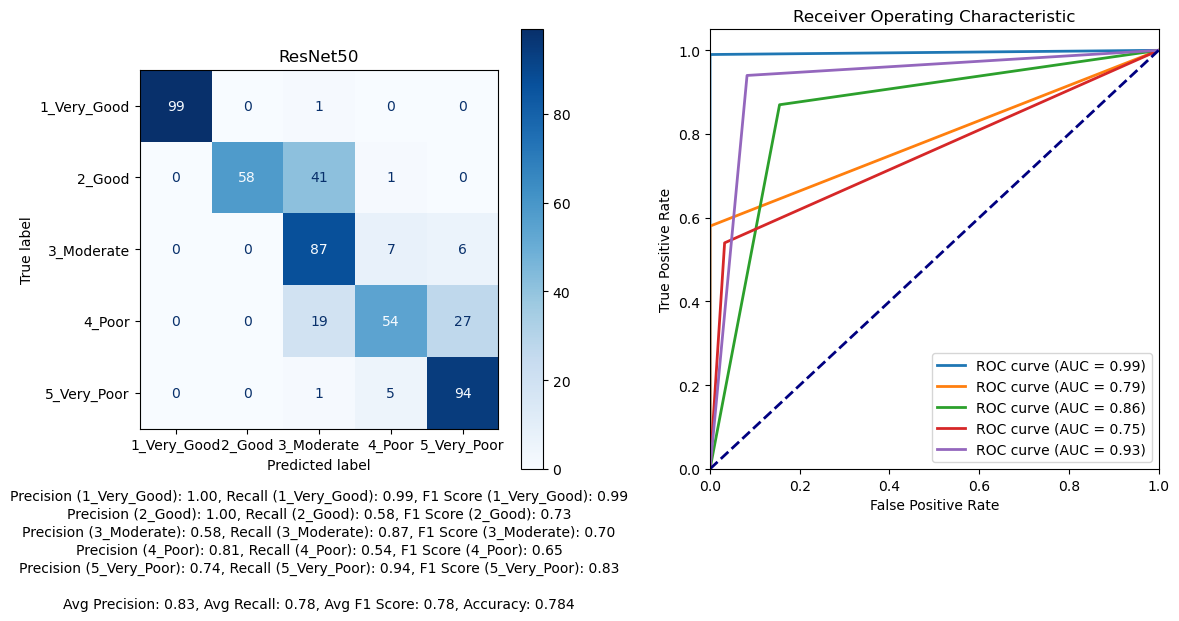

In [21]:
best_res50_model.to(device)
plot_all_measures(best_res50_model,test_dl,device,test_data.classes, "ResNet50")

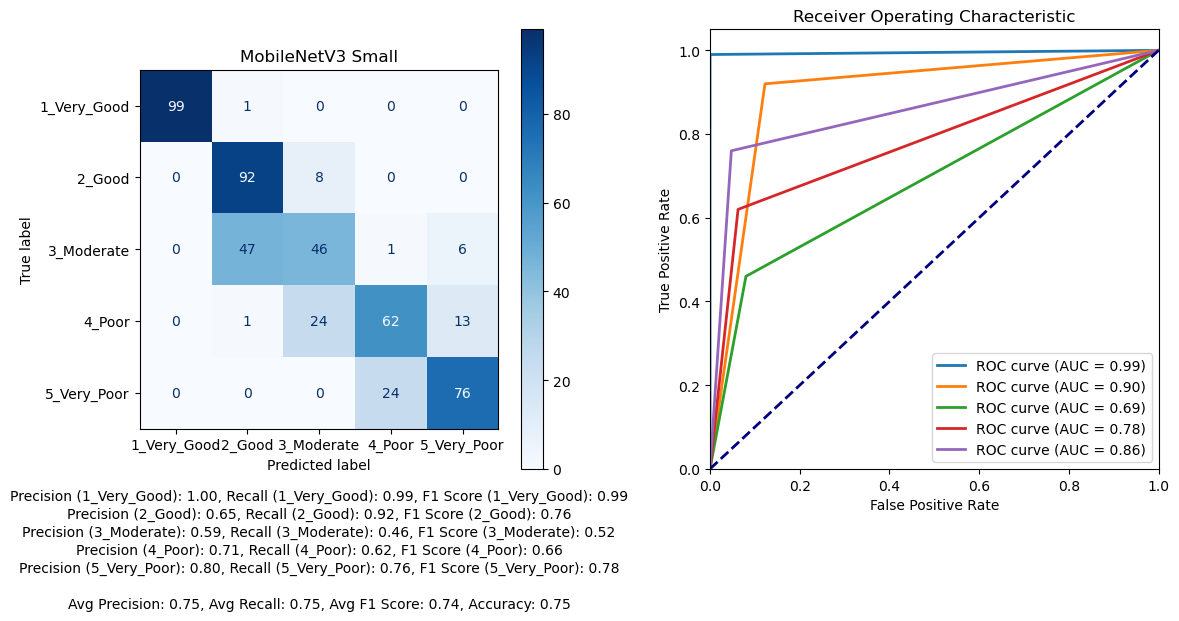

In [22]:
best_mobnet_sml_model.to(device)
plot_all_measures(best_mobnet_sml_model,test_dl,device,test_data.classes, "MobileNetV3 Small")

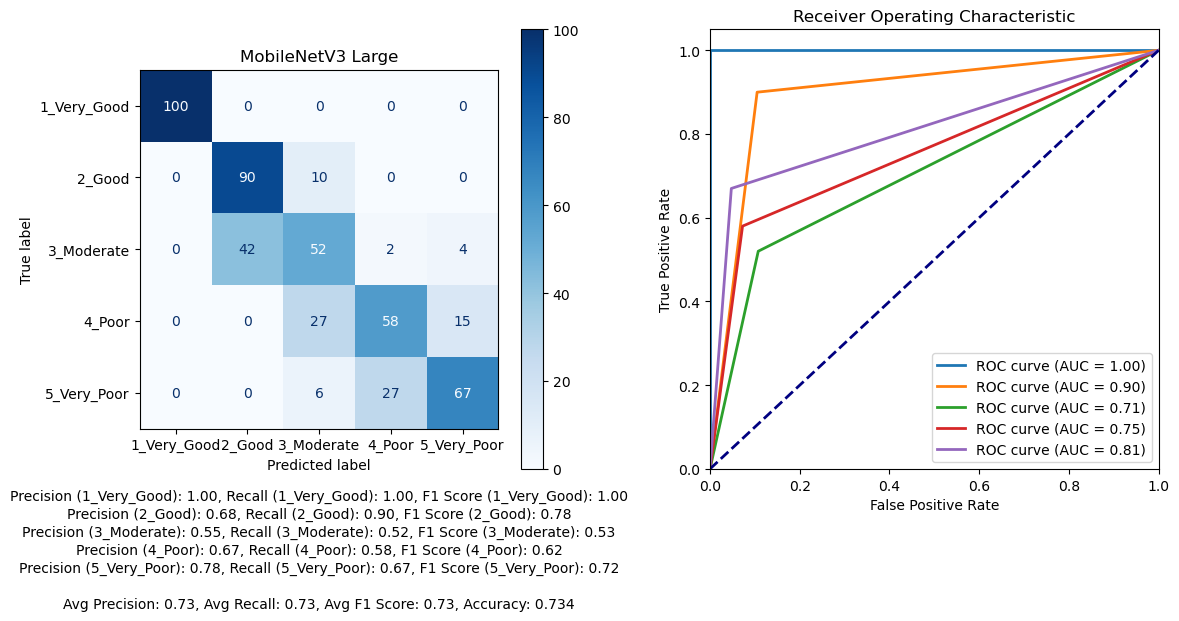

In [23]:
best_mobnet_lrg_model.to(device)
plot_all_measures(best_mobnet_lrg_model,test_dl,device,test_data.classes, "MobileNetV3 Large")

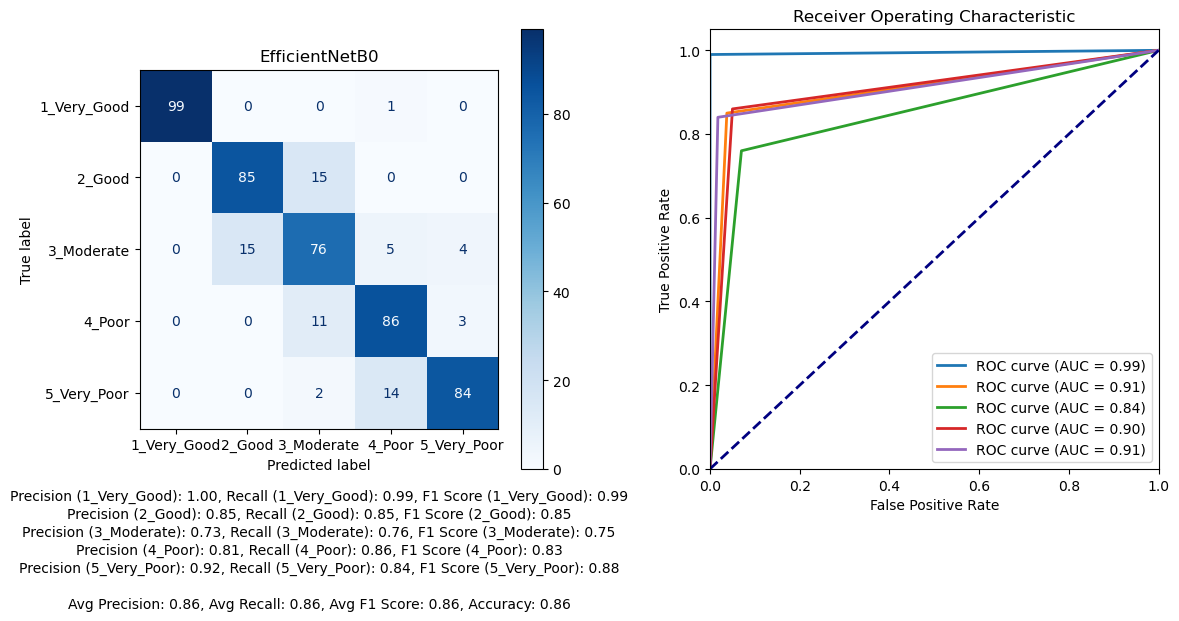

In [24]:
best_effnetb0_model.to(device)
plot_all_measures(best_effnetb0_model,test_dl,device,test_data.classes, "EfficientNetB0")

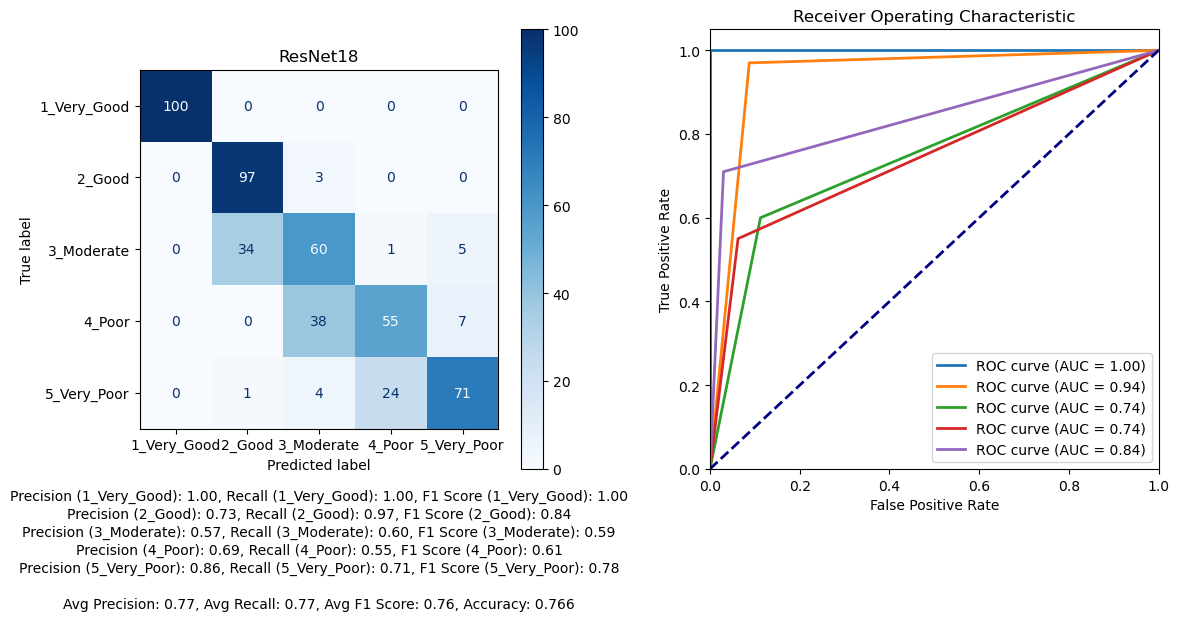

In [25]:
plot_all_measures(best_res18_model,validation_dl,device,test_data.classes, "ResNet18")

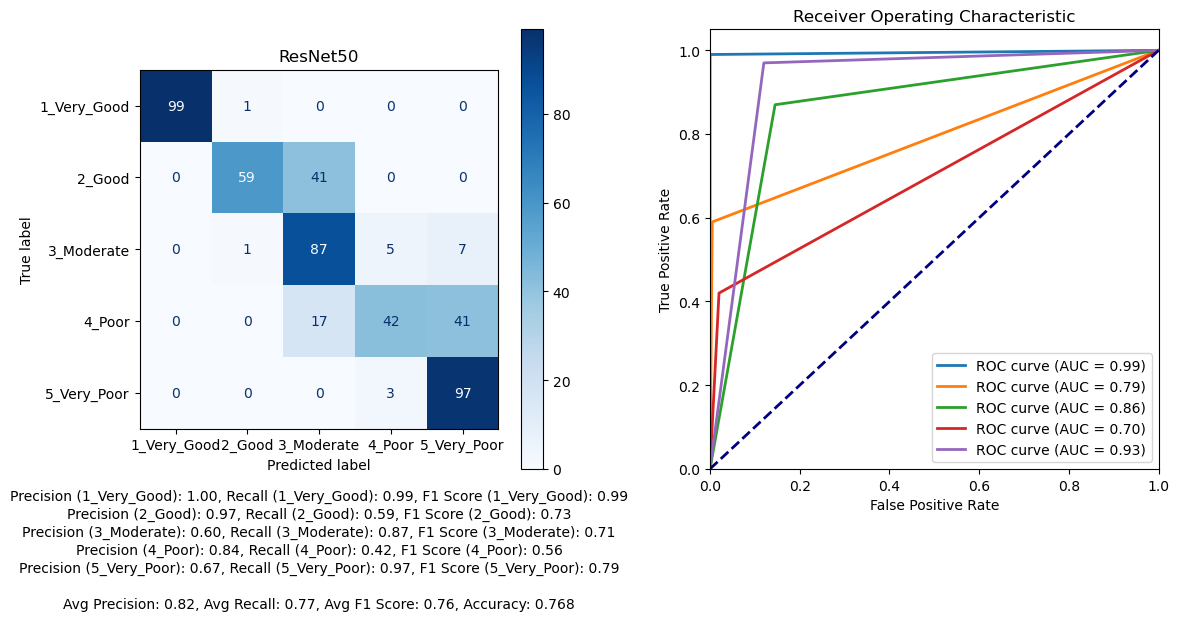

In [26]:
plot_all_measures(best_res50_model,validation_dl,device,test_data.classes, "ResNet50")

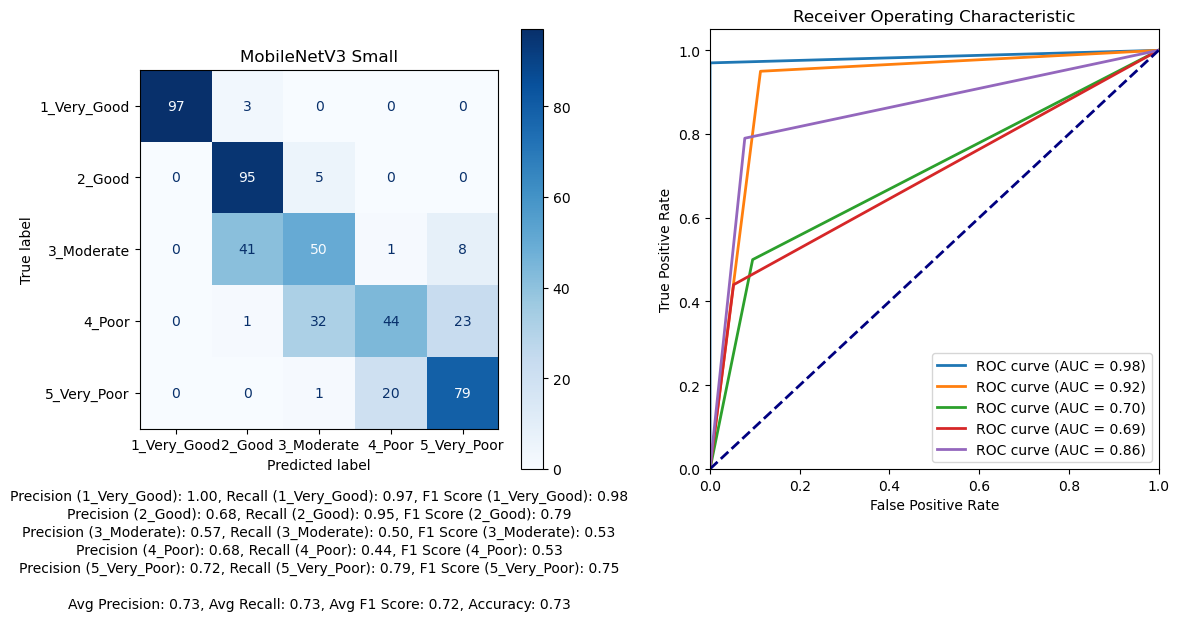

In [27]:
plot_all_measures(best_mobnet_sml_model,validation_dl,device,test_data.classes, "MobileNetV3 Small")

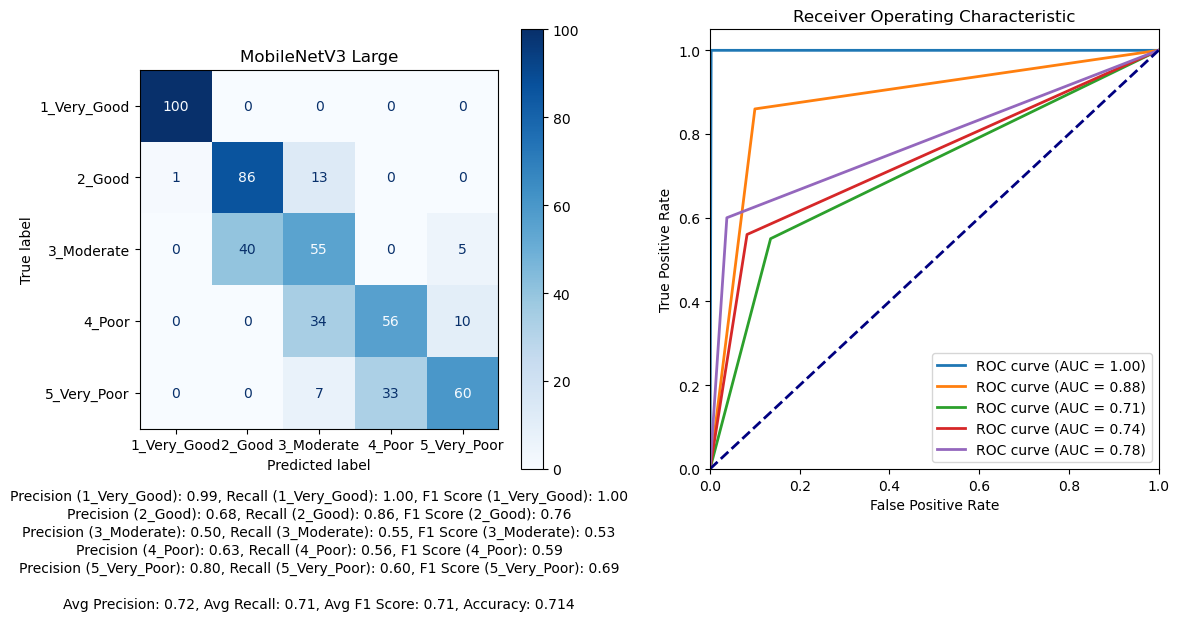

In [28]:
plot_all_measures(best_mobnet_lrg_model,validation_dl,device,test_data.classes, "MobileNetV3 Large")

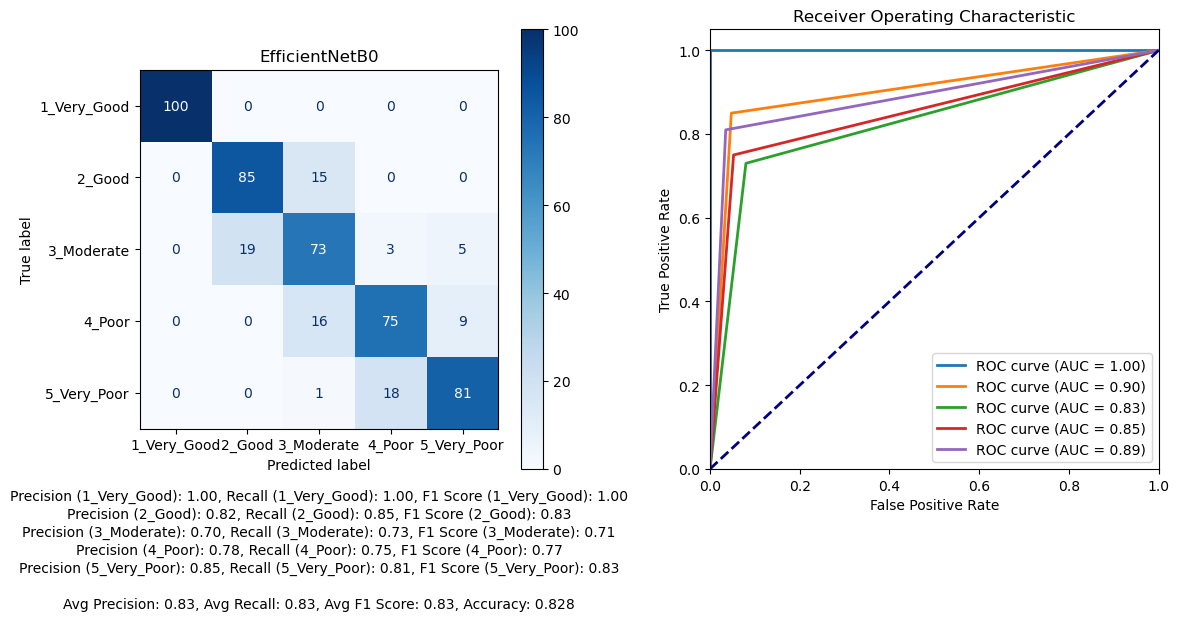

In [29]:
plot_all_measures(best_effnetb0_model,validation_dl,device,test_data.classes, "EfficientNetB0")